In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
!python3 /zhome/dc/1/174181/docs/QT/code/test.py --method 'sma'
plt.show()

Importing plotly failed. Interactive plots will not work.
2022-12-29, (MA Period 15) Ending Value 115936.92
Figure(640x480)


In [48]:
import yfinance as yf
df = yf.download('NVDA', start='2023-05-01', end='2023-05-30')
# save df to csv without index
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-01,278.399994,290.579987,277.799988,289.100006,289.100006,57032900
2023-05-02,286.799988,288.359985,280.829987,282.100006,282.100006,40273000
2023-05-03,278.399994,283.670013,274.720001,278.019989,278.019989,38338700
2023-05-04,276.510010,278.589996,272.399994,275.619995,275.619995,32185000
2023-05-05,278.260010,287.549988,277.309998,286.799988,286.799988,36101400
2023-05-08,285.220001,292.200012,283.500000,291.510010,291.510010,34497900
2023-05-09,288.989990,289.730011,284.500000,285.709991,285.709991,31486900
2023-05-10,290.049988,291.130005,284.609985,288.850006,288.850006,36935000
2023-05-11,288.959991,289.500000,282.459991,285.779999,285.779999,32214900


In [11]:
# get today date
import datetime
datetime.date.today()

datetime.date(2023, 5, 27)

In [8]:
import yfinance as yf
df = yf.download('NVDA', start='2017-01-01', end='2023-05-27')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-22,309.010010,315.200012,306.799988,311.760010,311.760010,37200000
2023-05-23,310.000000,312.880005,306.309998,306.880005,306.880005,35625300
2023-05-24,302.100006,306.070007,298.059998,305.380005,305.380005,72141900
2023-05-25,385.230011,394.799988,366.350006,379.799988,379.799988,154391100
2023-05-26,378.899994,391.700012,375.500000,389.459991,389.459991,71342900


In [17]:
# from fbprophet import Prophet
from prophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt
import sys
df = pd.read_csv('NVDA.csv', index_col=0)


In [15]:
int(0.8*(len(df)))

1208

In [102]:
df.to_csv('NVDA_norm.csv',index='datetime')

In [12]:
# from fastquant import get_crypto_data, backtest
# from fbprophet import Prophet
from prophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt
import sys

# Pull crypto data
# df = get_crypto_data("BTC/USDT", "2019-01-01", "2020-05-31")

# # Fit model on closing prices
# ts = df.reset_index()[["dt", "close"]]
# ts.columns = ['ds', 'y']
# m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(ts)
# forecast = m.make_future_dataframe(periods=0, freq='D')

# # Predict and plot
# pred = m.predict(forecast)
# fig1 = m.plot(pred)
# plt.title('BTC/USDT: Forecasted Daily Closing Price', fontsize=25)

In [18]:
ts = df.reset_index()[['Date', 'Close']]
ts.columns = ['ds', 'y']
# ts['pct']=ts.y.pct_change().multiply(100)
# set column 'ds' to datetime
ts['ds'] = pd.to_datetime(ts['ds'])

In [ ]:
# pick 0.7 as start of test data

In [24]:
# select the first 3 years as training data
sp = int(0.7*(len(ts)))
train = ts.iloc[:sp]
val = ts.iloc[sp:]
# get first and last date in validation set
val_dates = [val.ds.min(), val.ds.max()]

In [43]:
import datetime
x=datetime.datetime(2020, 12, 31)
print(x)

2020-12-31 00:00:00


In [63]:
date = datetime.datetime(2020, 12, 31)
train = ts.loc[ts.ds < date]

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 1005
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1006 non-null   datetime64[ns]
 1   y       1006 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.6 KB


In [37]:

fromdate,todate = ts.ds.iloc[sp], ts.ds.iloc[-1]
#change timestamps to datetime


In [49]:
m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(train)

16:49:34 - cmdstanpy - INFO - Chain [1] start processing
16:49:35 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'NVDA')

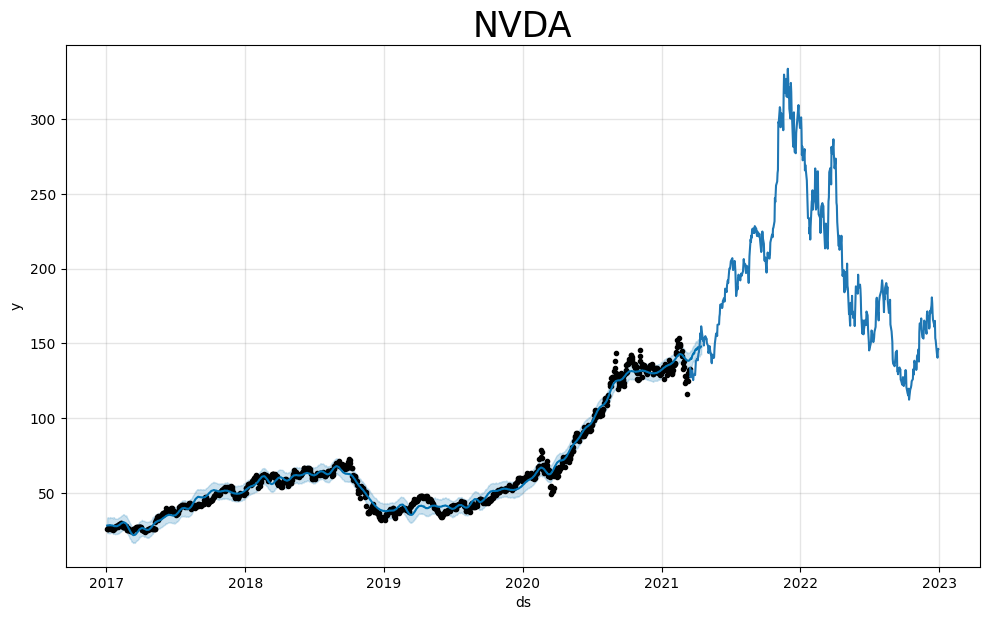

In [52]:
forecast = m.make_future_dataframe(periods=30, freq='D')
pred = m.predict(forecast)
fig1 = m.plot(pred)
#plot the validation data
plt.plot(val['ds'], val['y'], label = 'Actual Values')

plt.title('NVDA', fontsize=25)

In [56]:
pred.yhat.iloc[-1]

147.78842253078648

In [55]:
train.y.iloc[-1]

132.91250610351562

In [52]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-03,26.458939,23.136939,33.300915,26.458939,26.458939,1.580589,1.580589,1.580589,5.170979,...,0.313339,0.313339,0.313339,-3.903730,-3.903730,-3.903730,0.0,0.0,0.0,28.039528
1,2017-01-04,26.493974,22.388552,32.914782,26.493974,26.493974,1.612611,1.612611,1.612611,5.170979,...,0.331840,0.331840,0.331840,-3.890208,-3.890208,-3.890208,0.0,0.0,0.0,28.106585
2,2017-01-05,26.529009,22.835531,33.003343,26.529009,26.529009,1.566308,1.566308,1.566308,5.170979,...,0.273977,0.273977,0.273977,-3.878649,-3.878649,-3.878649,0.0,0.0,0.0,28.095317
3,2017-01-06,26.564044,22.552902,33.438302,26.564044,26.564044,1.507787,1.507787,1.507787,5.170979,...,0.207767,0.207767,0.207767,-3.870960,-3.870960,-3.870960,0.0,0.0,0.0,28.071830
4,2017-01-09,26.669148,23.192039,32.861176,26.669148,26.669148,1.448554,1.448554,1.448554,5.170979,...,0.165822,0.165822,0.165822,-3.888246,-3.888246,-3.888246,0.0,0.0,0.0,28.117702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,2022-12-06,277.358032,161.783853,408.280892,154.820639,404.298953,4.739436,4.739436,4.739436,5.170979,...,0.313339,0.313339,0.313339,-0.744882,-0.744882,-0.744882,0.0,0.0,0.0,282.097468
1687,2022-12-07,277.566155,159.266585,407.238746,154.856534,404.814993,4.520058,4.520058,4.520058,5.170979,...,0.331840,0.331840,0.331840,-0.982761,-0.982761,-0.982761,0.0,0.0,0.0,282.086213
1688,2022-12-08,277.774278,160.123760,408.825479,154.892429,405.331034,4.231903,4.231903,4.231903,5.170979,...,0.273977,0.273977,0.273977,-1.213054,-1.213054,-1.213054,0.0,0.0,0.0,282.006181
1689,2022-12-09,277.982401,157.962256,410.526536,154.942559,405.847074,3.942942,3.942942,3.942942,5.170979,...,0.207767,0.207767,0.207767,-1.435805,-1.435805,-1.435805,0.0,0.0,0.0,281.925342


<Axes: >

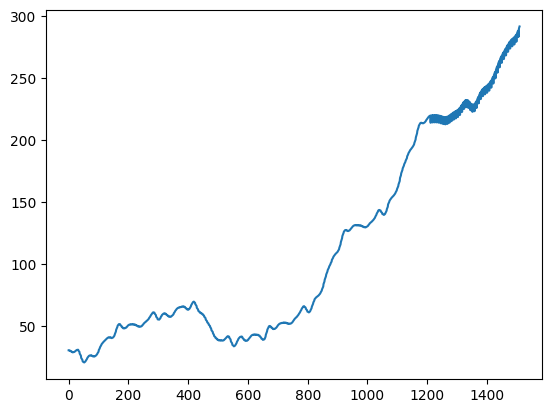

In [78]:
pred.yhat.plot()

<Axes: >

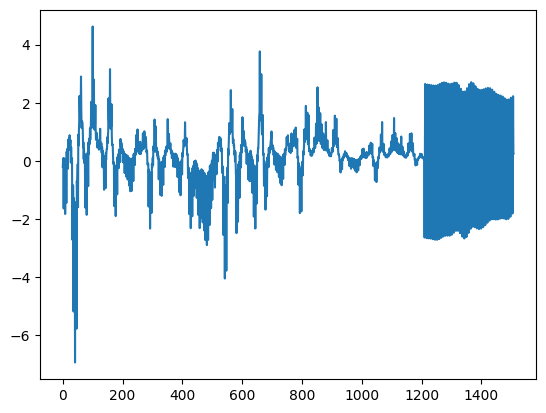

In [77]:
pred.yhat.pct_change().shift(-1).multiply(100).plot()

In [ ]:
expected_1day_return = pred.set_index("ds").yhat.pct_change().shift(-1).multiply(100)

,date,yhat,yhat_lower,yhat_upper
1,2020-05-11,2,3,4


In [5]:
import pandas as pd
ai_df = pd.read_csv('/home/lez/Documents/QT/QT/data/ai/BABA.csv',parse_dates=True,header=None)
ai_df.columns = ['date','yhat','yhat_lower','yhat_upper']
ai_df.set_index('date',inplace=True)
#change date to datetime
ai_df.index = pd.to_datetime(ai_df.index) 
# display(ai_df)
# row = pd.DataFrame({'date':[pd.to_datetime('2020-05-11')],'yhat':[2],'yhat_lower':[3],'yhat_upper':[4]})
# row.set_index('date',inplace=True)
# row.index = pd.to_datetime(row.index)
# new_df = pd.concat([ai_df,row],axis=0)
# display(new_df)
# dformat = '%Y-%m-%d'
d = pd.to_datetime('2020-05-4')
d = str(d)
print(d)
# ai_df.loc['2020-05-05']
type(ai_df.loc[d,'yhat'])

2020-05-04 00:00:00


pandas.core.series.Series

In [12]:
isinstance(ai_df.loc['2020-05-04','yhat'],pd.core.series.Series)

False

In [10]:
#del duplicate rows
ai_df = ai_df[~ai_df.index.duplicated(keep='first')]

In [51]:
ai_df

,yhat,yhat_lower,yhat_upper
date,,,
2020-05-04,188.376665,177.383245,198.864303
2020-05-05,189.584712,178.839853,200.376289
2020-05-06,191.152389,180.458051,202.189035
2020-05-07,191.102845,179.923563,201.460578
2020-05-08,190.581615,180.957872,201.468059
...,...,...,...
2023-05-22,123.989010,89.530651,158.458888
2023-05-23,135.083333,100.711021,168.977276
2023-05-24,138.358334,105.658408,170.323487


In [47]:
d= '2020-05-04'
pd.to_datetime(d,format='%Y-%m-%d')
ai_df.loc[d]

KeyError: '2020-05-04'

In [37]:
# ai_df.loc[d]


KeyError: '2020-05-04'

In [113]:
import pandas as pd
import numpy as np
data = pd.DataFrame(np.random.randint(1,10,(5,5)), columns=list('aaabb'), index = list('11122'))
data.loc['1']

,a,a,a,b,b
1,7,6,6,6,2
1,6,2,7,8,7
1,8,1,8,3,8


In [46]:
ai_df.index

DatetimeIndex(['2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-18',
               ...
               '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18',
               '2023-05-19', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26'],
              dtype='datetime64[ns]', name='date', length=772, freq=None)

# try accuracy of next day prediction

## accuracy of increase/decrease prediction base on past data = 0.55

In [98]:
r = ts.y.pct_change().multiply(100)
f = pred.yhat.pct_change().multiply(100)

In [102]:
# add new column to r, f if value is positive set to 1, else 0
r[r > 0] = 1
r[r <= 0] = 0
f[f > 0] = 1
f[f <= 0] = 0 

In [108]:
f

0       NaN
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
1204    1.0
1205    1.0
1206    1.0
1207    1.0
1208    1.0
Name: yhat, Length: 1209, dtype: float64

In [107]:
(r-f).dropna().value_counts()

 0.0    665
-1.0    371
 1.0    172
Name: count, dtype: int64

In [156]:
665/len(r)

0.5509527754763878

## change prediction to pct

In [157]:
ts['pct']=ts.y.pct_change().multiply(100)
train = ts.iloc[:int(0.8*(len(ts)))][['ds', 'pct']].dropna()
train.columns = ['ds', 'y']
m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(train)
forecast = m.make_future_dataframe(periods=0, freq='D')
pred = m.predict(forecast)

18:03:30 - cmdstanpy - INFO - Chain [1] start processing
18:03:31 - cmdstanpy - INFO - Chain [1] done processing


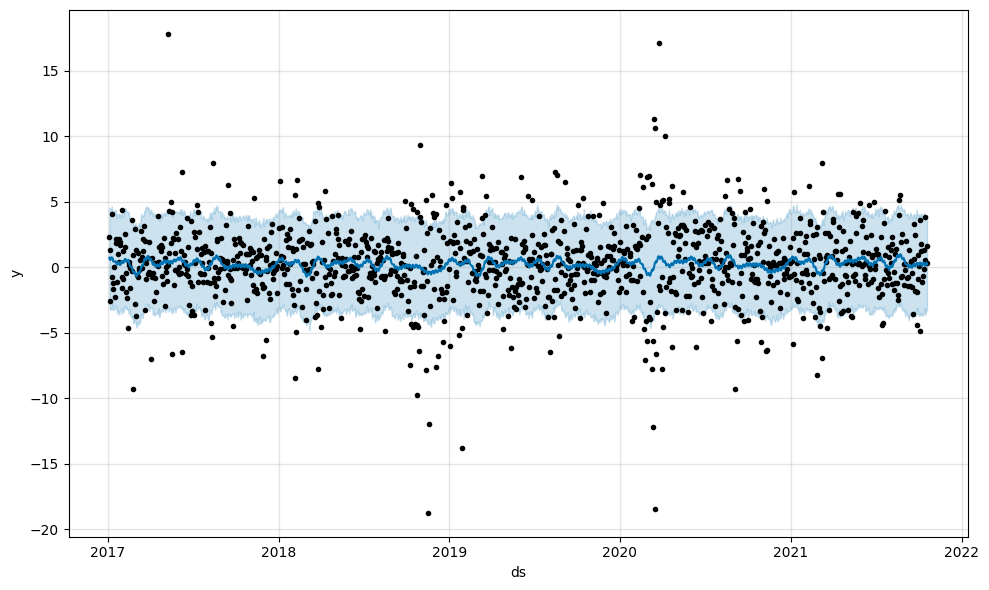

In [158]:
fig1 = m.plot(pred)

In [131]:
r= train.y
f = pred.yhat


In [132]:
r[r > 0] = 1
r[r <= 0] = 0
f[f > 0] = 1
f[f <= 0] = 0 

/tmp/ipykernel_26049/3728151998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r[r <= 0] = 0
/tmp/ipykernel_26049/3728151998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f[f > 0] = 1
/tmp/ipykernel_26049/3728151998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f[f <= 0] = 0


In [134]:
(r-f).dropna().value_counts()

 0.0    670
-1.0    393
 1.0    143
Name: count, dtype: int64

## change to 0/1 prediction

In [5]:
ts_01 = ts.copy().dropna()
# if y is positive set to 1, else 0
ts_01.y[ts_01.pct > 0] = 1
ts_01.y[ts_01.pct <= 0] = 0
train = ts_01[['ds', 'y']].iloc[:int(0.8*(len(ts_01)))]
m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(train)
forecast = m.make_future_dataframe(periods=0, freq='D')
pred = m.predict(forecast)
fig1 = m.plot(pred)

AttributeError: 'DataFrame' object has no attribute 'pct'

In [181]:
pred.yhat[pred.yhat > 0.5] = 1
pred.yhat[pred.yhat <= 0.5] = 0
r= train.y
f = pred.yhat

/tmp/ipykernel_26049/1910286348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred.yhat[pred.yhat > 0.4] = 1
/tmp/ipykernel_26049/1910286348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred.yhat[pred.yhat <= 0.4] = 0


In [182]:
(r-f).dropna().value_counts()


 0.0    665
-1.0    541
Name: count, dtype: int64

In [160]:
val = ts_01[['ds', 'y']].iloc[int(0.8*(len(ts_01))):]
forecast = m.make_future_dataframe(periods=302, freq='D')
pred = m.predict(forecast)

In [169]:
pred.yhat[pred.yhat > 0.5] = 1
pred.yhat[pred.yhat <= 0.5] = 0
r= val.y
f = pred.yhat[-302:]

/tmp/ipykernel_26049/2887501821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred.yhat[pred.yhat > 0.5] = 1
/tmp/ipykernel_26049/2887501821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred.yhat[pred.yhat <= 0.5] = 0


In [172]:
(r-f).dropna().value_counts()

 0.0    170
 1.0     68
-1.0     63
Name: count, dtype: int64

In [173]:
170/302

0.5629139072847682

In [8]:
ts_01 = ts.copy().dropna()
# if y is positive set to 1, else 0
ts_01['new_y'] = ts_01['pct'].apply(lambda x: 1 if x > 0 else 0)

In [16]:
# if previous day y is positive set to 1, else 0
ts_01['prev_y'] = ts_01['new_y'].shift(1)
ts_01.dropna()
ts_01['subtraction'] = ts_01['new_y'] - ts_01['prev_y']
ts_01['subtraction'].value_counts()

subtraction
 0.0    712
-1.0    398
 1.0    398
Name: count, dtype: int64

In [14]:
712/len(ts_01)

0.47183565275016565

# Others

In [82]:
train = ts.iloc[:int(0.8*(len(ts)))]
# get next row after train
val = ts.iloc[int(0.8*(len(ts))):1+int(0.8*(len(ts)))]

m = Prophet(daily_seasonality=True, yearly_seasonality=True).fit(train)
forecast = m.make_future_dataframe(periods=1, freq='D')
pred = m.predict(forecast)
expected_1day_return = pred.yhat.pct_change().shift(-1).multiply(100)

17:25:44 - cmdstanpy - INFO - Chain [1] start processing
17:25:45 - cmdstanpy - INFO - Chain [1] done processing


In [83]:
expected_1day_return

0      -0.150927
1       0.026749
2       0.139650
3      -1.589923
4       0.110968
          ...   
1204    0.133047
1205    0.095634
1206    0.109968
1207    0.052171
1208         NaN
Name: yhat, Length: 1209, dtype: float64

# Backtrader

In [11]:
from __future__ import (absolute_import, division, print_function,unicode_literals)
import datetime 
import os.path
import sys  
import backtrader as bt
from prophet import Prophet
import sys

class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
        ('printlog', False),
    )
    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.date = self.datas[0].datetime.date(0)


        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        action, amount = self.predict()
        # Check if we are in the market
        if not self.position:
            if action == 'buy':
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy(size=amount)
        else:
            if action == 'sell':
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
    def stop(self):
        self.log('(MA Period %2d) Ending Value %.2f' %
                 (self.params.maperiod, self.broker.getvalue()), doprint=True)


In [5]:
datapath = '/zhome/dc/1/174181/docs/QT/code/NVDA_norm.csv'
data = bt.feeds.YahooFinanceCSVData(
    dataname=datapath,
    # Do not pass values before this date
    fromdate=datetime.datetime(2017, 1, 1),
    # Do not pass values before this date
    todate=datetime.datetime(2020, 12, 31),
    # Do not pass values after this date
    reverse=False)
print(data)

In [85]:
data = bt.feeds.BacktraderCSVData(dataname=datapath,fromdate=datetime.datetime(2017, 1, 1),todate=datetime.datetime(2021, 12, 31))
print(data)

In [12]:
# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
strats = cerebro.optstrategy(
    TestStrategy,
    #maperiod=range(10, 31),
    )

# modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
# datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')
datapath = '/zhome/dc/1/174181/docs/QT/code/NVDA.csv'
# Create a Data Feed
data = bt.feeds.YahooFinanceCSVData(
    dataname=datapath,
    # Do not pass values before this date
    fromdate=datetime.datetime(2017, 1, 1),
    # Do not pass values before this date
    todate=datetime.datetime(2020, 12, 31),
    # Do not pass values after this date
    reverse=False)

# Add the Data Feed to Cerebro
cerebro.adddata(data)

# Set our desired cash start
cerebro.broker.setcash(1000.0)

# Add a FixedSize sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=10)

# Set the commission
cerebro.broker.setcommission(commission=0.0)

# Run over everything
cerebro.run(maxcpus=1)

2017-01-09


SystemExit: 

# Analysis

In [32]:
import pandas as pd
sma_opt = pd.read_csv('/zhome/dc/1/174181/docs/QT/sma_results.csv')

In [26]:
sma_opt.columns

Index(['company', 'maperiod', 'beta', 'ending value', 'highest', 'lowest',
       'sharp_ratio'],
      dtype='object')

In [ ]:
for c in sma_opt.company.unique():
    display(sma_opt.query('company == @c').sort_values(by='lowest', ascending=False).head(5))

In [28]:
for c in sma_opt.company.unique():
    display(sma_opt.query('company == @c').sort_values(by='sharp_ratio', ascending=False).head(5))

,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
0,NFLX,17,0.05,94565.24266,134941.64393,78211.06994,-0.021872
9,NFLX,11,0.05,90928.47655,132283.42653,72020.63237,-0.029303
12,NFLX,13,0.05,89454.07270,133898.93427,72288.69664,-0.040327
4,NFLX,14,0.05,91622.70133,133203.54860,73866.44768,-0.041580
2,NFLX,12,0.05,88522.41256,131876.74087,71163.48186,-0.059916


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
29,FFIE,27,0.05,72718.48341,142900.03376,48418.76067,-0.049223
21,FFIE,28,0.05,64926.74107,127470.50808,43190.89559,-0.096208
27,FFIE,29,0.05,67038.37684,135615.48217,45956.21262,-0.120301
40,FFIE,30,0.05,67020.39496,135615.48217,45956.21262,-0.120746
35,FFIE,14,0.05,50975.78248,107760.33322,36510.10819,-0.271712


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
42,COIN,22,0.05,68438.77562,124884.04758,59946.70490,-0.525308
57,COIN,23,0.05,73272.29443,139624.71732,67024.37674,-0.620856
43,COIN,13,0.05,62359.71500,113183.72616,55015.98077,-0.624687
53,COIN,12,0.05,61891.93948,113183.72616,54597.22542,-0.627166
49,COIN,11,0.05,65249.47554,117220.16140,56542.14956,-0.649452


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
82,NVDA,18,0.05,455711.31155,455711.31155,99932.07537,1.126480
71,NVDA,17,0.05,447743.91512,447743.91512,98259.33971,1.125791
63,NVDA,25,0.05,491394.39428,491394.39428,99907.17934,1.106503
68,NVDA,20,0.05,419463.63675,419463.63675,95226.01982,1.093049
81,NVDA,26,0.05,478257.34684,478257.34684,97793.60221,1.086270


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
104,DIDIY,28,0.05,177580.10956,229717.93766,91223.61628,1.970299
94,DIDIY,29,0.05,185428.79766,239870.20611,95282.19569,1.810260
90,DIDIY,30,0.05,194505.78674,251612.36307,100000.00000,1.680412
96,DIDIY,27,0.05,149712.56193,195833.06433,83466.99270,1.474228
84,DIDIY,26,0.05,144029.57724,194278.22290,82796.98848,1.240414


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
112,META,24,0.05,137735.07459,142580.83241,65550.34112,0.345848
108,META,23,0.05,135136.84270,142651.03716,65034.74274,0.335875
106,META,25,0.05,133262.18247,139951.55485,63528.31401,0.324413
109,META,22,0.05,125751.32198,142140.32151,63827.70550,0.300627
120,META,27,0.05,124665.67813,135560.93711,60905.24195,0.285591


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
131,BILI,19,0.05,135506.07674,245395.40765,63872.21725,0.431628
132,BILI,20,0.05,127380.60685,239903.09095,60813.53559,0.359445
127,BILI,21,0.05,124420.99285,236443.85077,63524.97145,0.335655
133,BILI,22,0.05,116114.26402,240477.83683,59280.01584,0.227531
126,BILI,25,0.05,115249.65877,249543.44306,56570.91221,0.223481


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
166,SPCE,20,0.05,62966.18942,100000.0,50575.24780,-0.417286
153,SPCE,19,0.05,61537.52028,100000.0,51236.52987,-0.584802
152,SPCE,18,0.05,60189.71311,100000.0,50309.52194,-0.592811
167,SPCE,30,0.05,50924.32802,100000.0,46256.83736,-0.625687
164,SPCE,29,0.05,51324.94305,100000.0,46620.31728,-0.658961


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
179,BABA,12,0.05,83904.91430,127763.41615,54101.50592,-0.105701
176,BABA,13,0.05,79901.52451,128826.12185,50468.95706,-0.149298
182,BABA,10,0.05,74227.94867,123802.49893,46877.83098,-0.163251
180,BABA,11,0.05,75920.20440,125581.52506,50349.47864,-0.187104
177,BABA,15,0.05,73796.03807,121356.32520,49262.72159,-0.292739


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
207,AAPL,13,0.05,219675.37119,224007.83540,97785.58638,0.928993
208,AAPL,15,0.05,219075.64046,223398.77117,97785.58638,0.882092
194,AAPL,19,0.05,199459.21513,201959.05513,95257.05706,0.862501
197,AAPL,14,0.05,218587.26574,222899.74427,97785.58638,0.858920
206,AAPL,18,0.05,208690.56050,212448.75536,97592.09980,0.841761


In [40]:
ai_opt = pd.read_csv('/zhome/dc/1/174181/docs/QT/results/ai_results.csv')
def show_sr(df):
    for c in df.company.unique():
        display(df.query('company == @c').sort_values(by='sharp_ratio', ascending=False).head(5))
show_sr(ai_opt)

,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
4,NFLX,15,0.05,57490.58444,150776.64635,39152.35058,-0.163885
5,NFLX,15,0.15,53627.42021,119162.59319,36764.75126,-0.359903
0,NFLX,15,0.20,49969.98534,119625.76450,36343.59380,-0.415859
2,NFLX,15,0.10,48412.39946,115723.20967,32978.67633,-0.510520
3,NFLX,15,0.25,53444.64812,102870.52283,37686.43283,-0.626956


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
9,FFIE,15,0.05,102338.0807,251249.28122,88403.10056,0.144598
6,FFIE,15,0.20,67198.2357,190491.36410,65261.62055,-1.060972
10,FFIE,15,0.30,67198.2357,190491.36410,65261.62055,-1.060972
11,FFIE,15,0.25,67198.2357,190491.36410,65261.62055,-1.060972
7,FFIE,15,0.15,76438.5662,216686.30256,74235.64059,-1.084884


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
17,COIN,15,0.20,112533.69605,191093.15202,92531.36927,2.822888
16,COIN,15,0.05,175929.01668,215299.88398,100000.00000,2.715853
12,COIN,15,0.15,114549.39168,189179.73896,90867.22154,1.534020
14,COIN,15,0.10,134602.51304,200101.09444,94919.48970,1.154884
15,COIN,15,0.25,106866.45400,187617.74528,83504.93964,0.283377


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
23,NVDA,15,0.05,169112.18879,297280.44621,99864.04690,0.487863
18,NVDA,15,0.15,142870.73778,242576.03582,88924.74256,0.343786
21,NVDA,15,0.25,134839.52318,222974.27813,87544.36257,0.322046
19,NVDA,15,0.20,129993.19151,211908.56802,83206.16130,0.299469
20,NVDA,15,0.10,114275.54934,199919.52287,78515.27338,0.234290


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
25,DIDIY,15,0.30,47496.60582,100000.0000,47496.60582,-3.918624
28,DIDIY,15,0.25,46811.53542,100000.0000,46811.53542,-4.190820
24,DIDIY,15,0.20,46602.19029,100000.0000,46602.19029,-4.225833
29,DIDIY,15,0.15,46442.06641,100000.0000,46442.06641,-4.536230
27,DIDIY,15,0.05,46676.10881,100297.8991,46676.10881,-4.857521


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
32,META,15,0.05,88834.54633,174983.40150,77985.80293,0.064807
35,META,15,0.15,79293.42953,185007.63231,75643.54997,0.000637
30,META,15,0.10,77376.12436,178851.84576,73120.59496,-0.030841
34,META,15,0.20,62099.68172,148371.60435,61479.01481,-0.210259
31,META,15,0.25,50927.19996,127208.51630,45992.90099,-0.381035


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
40,BILI,15,0.05,33423.77884,134513.79511,32043.23394,-0.862522
36,BILI,15,0.30,26691.20450,115483.09978,25516.14550,-1.064639
37,BILI,15,0.25,36208.51275,127357.11401,33668.42641,-1.161052
39,BILI,15,0.10,36334.06429,124342.79473,34585.36910,-1.221346
38,BILI,15,0.15,38832.25712,128287.61211,36675.26405,-1.246034


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
42,SPCE,15,0.30,45544.96571,108352.11301,26712.52594,-0.231406
45,SPCE,15,0.15,39220.63508,105954.45572,26146.16133,-0.443616
44,SPCE,15,0.25,38717.09837,108371.72499,25810.84379,-0.446250
43,SPCE,15,0.20,38112.35682,105954.45572,25407.99055,-0.451328
47,SPCE,15,0.10,36467.19435,105954.45572,26444.44001,-0.609900


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
51,BABA,15,0.05,100630.84494,127750.94281,59941.84910,0.089353
48,BABA,15,0.15,89409.73767,105782.95738,52902.91204,-0.119624
50,BABA,15,0.10,78616.47107,102077.63675,50727.89155,-0.266019
53,BABA,15,0.20,50700.71474,119828.62210,34161.07282,-0.635774
49,BABA,15,0.30,61912.18409,116556.34960,50572.54960,-0.648873


,company,maperiod,beta,ending value,highest,lowest,sharp_ratio
55,AAPL,15,0.20,202080.27789,204780.53586,100000.00000,0.777000
56,AAPL,15,0.15,242011.18185,267579.95241,97785.58638,0.726751
59,AAPL,15,0.05,168438.37217,200055.15878,97785.58638,0.702022
54,AAPL,15,0.10,219281.15297,259646.88489,97785.58638,0.670356
57,AAPL,15,0.30,128784.15802,130322.68802,94518.18802,0.456305


In [61]:
#read yml file
import yaml
file = '/zhome/dc/1/174181/docs/QT/code/setting.yml'
with open(file) as file:
    params = yaml.load(file, Loader=yaml.FullLoader)
file.close()
print(params)
params['NFLX']


{'NFLX': 17, 'FFIE': 27, 'COIN': 23, 'NVDA': 25, 'DIDIY': 30, 'META': 24, 'BILI': 19, 'SPCE': 20, 'BABA': 12, 'AAPL': 13}


17

## compare with other models

In [2]:
import pandas as pd
# list folders in directory
import os
results_dir = '/home/lez/Documents/QT/QT/results'
filename_list = os.listdir(results_dir)
# read all csv files in folder
# df = [pd.read_csv(f) for f in filename_list]
print(filename_list)

['vote(ksrma)', 'ai_results.txt', 'rsi', 'sma_results.txt', 'ai.txt', 'testkdj', 'vote0.5.txt', 'trend', 'macd', 'vote_beta.txt', 'vote(asm)', 'vote(mrsaa)', 'macd.txt', 'sma_results.csv', 'rsi_results.csv', 'ai_results.csv', 'vote0.5_results.csv', 'ai(cons)', 'testmacd', 'sma.txt', 'vote(rs)', 'macd_results.csv', 'ai(pos)', 'rsi.txt', 'sma', 'kdj', 'vote(srma_opt)', 'ai', 'vote(asmtt)', 'vote(asmt)', 'vote_results.csv', 'vote(srma)', 'vote(srm)', 'vote(rsa)', 'vote(smmra)', 'vote.txt']


In [7]:
import pandas as pd
macd_df = pd.read_csv('/home/lez/Documents/QT/QT/results/macd_results.csv',index_col='company')
rsi_df = pd.read_csv('/home/lez/Documents/QT/QT/results/rsi/rsi_results.csv',index_col='company')
sma_df = pd.read_csv('/home/lez/Documents/QT/QT/results/sma/sma_results.csv',index_col='company')
vote_df = pd.read_csv('/home/lez/Documents/QT/QT/results/vote0.5_results.csv',index_col='company')
ai_df = pd.read_csv('/home/lez/Documents/QT/QT/results/ai_results.csv',index_col='company')
ai_cons = pd.read_csv('/home/lez/Documents/QT/QT/results/ai(cons)/ai_results.csv',index_col='company')
ai_pos = pd.read_csv('/home/lez/Documents/QT/QT/results/ai(pos)/ai_results.csv',index_col='company')
# vote2_df = pd.read_csv('/home/lez/Documents/QT/QT/results/vote(srm)/vote_results.csv',index_col='company') #'vote(srm-2/3)' same as macd
kdj_df = pd.read_csv('/home/lez/Documents/QT/QT/results/kdj/kdj_results.csv',index_col='company')
trend_df = pd.read_csv('/home/lez/Documents/QT/QT/results/trend/trend_results.csv',index_col='company')
vote_rsa = pd.read_csv('/home/lez/Documents/QT/QT/results/vote(rsa)/vote_results.csv',index_col='company')
vote_mrsaa = pd.read_csv('/home/lez/Documents/QT/QT/results/vote(mrsaa)/vote_results.csv',index_col='company')
vote_smmra = pd.read_csv('/home/lez/Documents/QT/QT/results/vote(smmra)/vote_results.csv',index_col='company')
# vote_srma_opt = pd.read_csv('/home/lez/Documents/QT/QT/results/vote(srma_opt)/vote_results.csv',index_col='company') #results too bad
vote_srma = pd.read_csv('/home/lez/Documents/QT/QT/results/vote(srma)/vote_results.csv',index_col='company') #too frequent
vote_msa = pd.read_csv('/home/lez/Documents/QT/QT/results/vote(asm)/vote_results.csv',index_col='company')
vote_ksrma = pd.read_csv('/home/lez/Documents/QT/QT/results/vote(ksrma)/vote_results.csv',index_col='company')
vote_asmt = pd.read_csv('/home/lez/Documents/QT/QT/results/vote(asmt)/vote_results.csv',index_col='company')
vote_asmtt = pd.read_csv('/home/lez/Documents/QT/QT/results/vote(asmtt)/vote_results.csv',index_col='company')

In [16]:
name_list = ['macd', 'rsi', 'sma', 'ai','ai(con)','ai(pos)','kdj','trend','vote(asmtt)','vote(asmt)','vote(srma-0.5)', 'vote(rsa)','vote(mrsaa)','vote(smmra)','vote(srma)','vote(msa)','vote(ksrma)']
# result_df = pd.DataFrame()
for idx,df in enumerate([macd_df, rsi_df, sma_df,ai_df,ai_cons,ai_pos,kdj_df,trend_df,vote_asmt, vote_asmtt,vote_df,vote_rsa,vote_mrsaa,vote_smmra,vote_srma,vote_msa,vote_ksrma]):
    
    tmp = df[['sharp_ratio']]
    tmp.columns = [name_list[idx]]
    if idx == 0:
        result_df = tmp
    else:
        result_df = pd.concat([result_df,tmp],axis=1)

    # else:
    #     tmp = df[['sharp_ratio']]
    #     tmp.columns = [name_list[idx]]
display(result_df)
display(result_df.describe())

,macd,rsi,sma,ai,ai(con),ai(pos),kdj,trend,vote(asmtt),vote(asmt),vote(srma-0.5),vote(rsa),vote(mrsaa),vote(smmra),vote(srma),vote(msa),vote(ksrma)
company,,,,,,,,,,,,,,,,,
NFLX,-0.123759,-0.278572,-0.082918,-0.163885,-0.512226,-0.258947,0.068848,-0.426168,-0.385528,-0.367332,-0.376886,-0.372376,-0.372376,0.016089,-0.219740,-0.376810,-0.535813
FFIE,-1.451683,0.990684,-0.409680,0.144598,-1.039662,0.050013,-2.679036,0.000000,0.425725,-1.082925,0.144730,0.144660,0.144660,-1.514880,0.905753,0.425725,-1.042524
COIN,-0.416428,0.445573,-0.617412,5.666973,0.432152,0.961296,0.427575,-0.258741,-1.217277,-0.009750,0.493242,-1.180320,-1.174224,-0.415184,1.468124,-1.322737,0.150266
NVDA,0.558480,-0.544285,1.041196,0.329704,0.289794,0.471370,0.398282,0.882574,0.852549,0.837228,0.378830,0.412504,0.412504,0.562821,0.812650,0.622334,-0.023219
DIDIY,1.217193,0.840259,1.680450,-4.727147,-2.058469,-3.038609,-1.301641,-1.081223,0.554754,-1.081223,0.103849,0.348833,0.341685,1.200143,0.092938,0.558225,0.875671
META,0.285180,-0.254036,0.276816,-0.091531,-0.307533,0.128038,-0.079875,0.571482,-0.208878,-0.174533,-0.218008,-0.285794,-0.285794,0.302551,-0.374659,-0.219748,-0.205264
BILI,-1.226692,-1.052670,0.033815,-1.101414,-0.960842,-0.298335,-1.086648,-0.894589,-0.576405,-1.075416,-0.971032,-0.680852,-0.680852,-1.216934,-1.043531,-0.378545,-1.030753
SPCE,-0.822125,0.015649,-0.654319,-1.010456,-1.092863,-0.786609,-0.702550,-0.811774,-1.185915,-0.744967,-0.630255,-0.607916,-0.946757,-1.208699,-0.925074,-1.187452,-0.456771
BABA,-1.109261,-0.312221,-0.184748,0.105324,-1.076170,0.039822,-0.806840,-1.485929,-0.769818,-1.022366,-0.005828,-0.800332,-0.800332,-1.076761,0.444157,-0.763984,-0.825031


,macd,rsi,sma,ai,ai(con),ai(pos),kdj,trend,vote(asmtt),vote(asmt),vote(srma-0.5),vote(rsa),vote(mrsaa),vote(smmra),vote(srma),vote(msa),vote(ksrma)
count,10.000000,13.000000,13.000000,10.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,10.000000,10.000000,10.000000,12.000000,9.000000,13.000000,12.000000
mean,-0.261261,0.028096,0.110696,-0.033302,-0.479493,-0.104759,-0.405037,-0.177494,-0.163470,-0.376872,-0.052336,-0.265957,-0.300845,-0.295198,0.128958,-0.172885,-0.130553
std,0.889850,0.589620,0.792777,2.519359,0.771311,0.999522,0.905198,0.725013,0.658621,0.683235,0.498021,0.560125,0.589442,0.844699,0.853360,0.629809,0.767039
min,-1.451683,-1.052670,-1.216552,-4.727147,-2.058469,-3.038609,-2.679036,-1.485929,-1.217277,-1.082925,-0.971032,-1.180320,-1.174224,-1.514880,-1.043531,-1.322737,-1.042524
25%,-1.037477,-0.312221,-0.409680,-0.798814,-1.039662,-0.258947,-0.806840,-0.811774,-0.576405,-1.027189,-0.337166,-0.662618,-0.770462,-1.109746,-0.374659,-0.378545,-0.608118
50%,-0.270093,-0.059245,0.033815,0.006896,-0.512226,0.050013,-0.079875,0.000000,-0.208878,-0.367332,0.049011,-0.329085,-0.329085,-0.340500,0.092938,-0.116762,-0.331017
75%,0.428662,0.445573,0.494952,0.283428,0.097103,0.435422,0.128374,0.377532,0.425725,0.000708,0.320305,0.297789,0.292429,0.349283,0.812650,0.411753,0.309770
max,1.217193,0.990684,1.680450,5.666973,0.641036,0.961296,0.604461,0.882574,0.852549,0.837228,0.557995,0.412504,0.412504,1.200143,1.468124,0.622334,1.270511


In [3]:
import pandas as pd
ai_dd = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/ai/ai_results.csv',index_col='company')
ai2_dd = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/ai(beta0.2)/ai_results.csv',index_col='company')
sma_df = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/sma/sma_results.csv',index_col='company')
trend_dd = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/trend/trend_results.csv',index_col='company')
vote_asmt_dd = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/vote(asmt)/vote_results.csv',index_col='company')
vote_asmtt_dd = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/vote(asmtt)/vote_results.csv',index_col='company')
asmt_beta02 = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/asmt(beta0.2)/vote_results.csv',index_col='company')
asmtt_beta02 = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/asmtt(beta0.2)/vote_results.csv',index_col='company')
asmt_bs = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/asmt(beta0.2+sell1st)/vote_results.csv',index_col='company')
asmt_slope = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/asmt(slope)/vote_results.csv',index_col='company')
asm_t = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/asmt(t1st)/vote_results.csv',index_col='company')
tcsm = pd.read_csv('/home/lez/Documents/QT/QT/results/drawdown/vote(tcsm)/vote_results.csv',index_col='company')
tcsm_nodd = pd.read_csv('/home/lez/Documents/QT/QT/results/vote(tcsm)/vote_results.csv',index_col='company')

name_list = ['ai','ai(beta0.2)','sma','trend','asmt(beta0.2)','tcsm_nodd','tcsm','asm(t1st)','vote(asmt)','asmt_slope','asmt_bs','vote(asmtt)','asmtt(beta0.2)']

# result_df = pd.DataFrame()
for idx,df in enumerate([ai_dd,ai2_dd,sma_df,trend_dd,asmt_beta02,tcsm_nodd,tcsm,asm_t,vote_asmt_dd,asmt_slope,asmt_bs,vote_asmtt_dd,asmtt_beta02]):    
    tmp = df[['max_drawndown']]
    tmp.columns = [name_list[idx]]
    if idx == 0:
        result_df = tmp
    else:
        result_df = pd.concat([result_df,tmp],axis=1)
display(result_df)
display(result_df.describe())

,ai,ai(beta0.2),sma,trend,asmt(beta0.2),tcsm_nodd,tcsm,asm(t1st),vote(asmt),asmt_slope,asmt_bs,vote(asmtt),asmtt(beta0.2)
company,,,,,,,,,,,,,
META,54.552261,49.680022,34.463765,25.674680,46.173084,44.733187,38.322502,45.398325,47.112677,34.915976,46.173084,32.803511,37.406642
NDX,28.763174,19.130730,24.619299,18.299142,17.858030,11.956724,11.956724,17.858030,25.293889,12.620543,17.858030,20.170083,18.299142
BABA,55.732868,23.829633,43.472271,39.422738,48.801994,39.482438,33.717859,48.801994,55.106554,32.518462,48.801994,48.108922,36.216576
BILI,77.345591,65.932760,53.266956,22.609764,58.282538,65.185051,42.150581,58.282538,63.275525,49.858427,58.282538,40.188390,22.609764
AAPL,33.882427,22.149371,23.630479,20.175608,19.793570,16.665002,16.665002,19.793570,27.541698,17.311495,19.793570,29.780089,20.175608
COIN,39.661027,44.317648,39.062558,22.682206,55.559289,61.868921,40.130395,55.559289,50.808825,25.851016,55.559289,37.681889,22.831120
FFIE,55.647843,55.647843,38.248860,0.000000,39.590683,75.564065,23.425676,39.590683,39.590683,39.587828,39.590683,23.365667,23.365667
NVDA,59.182631,57.607793,45.065291,26.928760,44.706418,55.101121,45.745667,44.706418,51.308280,37.278017,44.706418,36.525826,36.287403
PDD,77.211801,56.857284,53.046325,34.856900,54.368828,31.590289,30.287436,54.368828,56.715947,34.063249,54.368828,34.746751,34.746751


,ai,ai(beta0.2),sma,trend,asmt(beta0.2),tcsm_nodd,tcsm,asm(t1st),vote(asmt),asmt_slope,asmt_bs,vote(asmtt),asmtt(beta0.2)
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,56.275497,50.019156,39.603209,20.928969,41.112550,42.031103,29.196472,41.052953,46.948546,30.664872,41.112550,30.520275,24.373674
std,15.878451,18.577652,11.401130,11.138948,13.127220,20.375539,11.231618,13.104069,11.843037,10.387880,13.127220,8.939122,10.203043
min,28.763174,19.130730,20.576695,0.000000,17.858030,10.560460,10.560460,17.858030,25.293889,12.620543,17.858030,20.095208,0.000000
25%,44.185603,43.570510,34.463765,18.994599,34.750587,31.590289,23.425676,34.750587,39.590683,22.418110,34.750587,21.735729,20.175608
50%,55.732868,55.647843,40.002313,21.942525,44.706418,41.977876,30.287436,44.706418,47.112677,34.063249,44.706418,31.071841,22.831120
75%,68.251153,65.932760,45.065291,25.674680,48.801994,55.101121,38.322502,48.801994,55.106554,37.278017,48.801994,36.525826,34.746751
max,77.345591,71.599467,55.760997,39.422738,58.282538,75.564065,45.745667,58.282538,63.275525,49.858427,58.282538,48.108922,37.406642


# increment data acquisition (give up)

In [2]:
import yfinance as yf

msft = yf.Ticker("MSFT")
# msft.history()
msft.info['bid']

337.25

In [6]:
df = yf.Ticker("AAPL").history()

In [8]:
yf.Ticker("AAPL").history()#.iloc[-1,:5]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-27 00:00:00-04:00,164.961830,168.327170,164.961830,168.177383,64902300,0.00,0.0
2023-04-28 00:00:00-04:00,168.257274,169.615396,167.648116,169.445618,55209200,0.00,0.0
2023-05-01 00:00:00-04:00,169.046174,170.214556,168.407059,169.355743,52472900,0.00,0.0
2023-05-02 00:00:00-04:00,169.855052,170.114703,167.308571,168.307190,48425700,0.00,0.0
2023-05-03 00:00:00-04:00,169.265876,170.683912,166.929111,167.218704,65136000,0.00,0.0
2023-05-04 00:00:00-04:00,164.662239,166.809263,164.083038,165.560989,81235400,0.00,0.0
2023-05-05 00:00:00-04:00,170.743827,174.059249,170.524130,173.330261,113316400,0.00,0.0
2023-05-08 00:00:00-04:00,172.241750,173.609868,171.872266,173.260345,55962800,0.00,0.0
2023-05-09 00:00:00-04:00,172.810976,173.300290,171.362982,171.532745,45326900,0.00,0.0


In [3]:
import pandas as pd
import yfinance as yf
import datetime
tmp = pd.DataFrame(yf.Ticker("AAPL").history().iloc[-1,:5]).T
pd.Timestamp(datetime.date(2013, 12, 25))
tmp
# pd.concat([tmp,yf.Ticker("AAPL").history()])
# tmp.index[-1] == df.index[-1]

,Open,High,Low,Close,Volume
2023-06-01 00:00:00-04:00,177.699997,180.119995,176.929993,180.089996,68813900.0


In [5]:
yf.Ticker("AAPL").info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

In [20]:
(str(tmp.index[-1]).split(' ')[0]) == str(df.index[-1])

True

In [3]:
tmp.index[-1].date()

datetime.date(2023, 5, 26)

In [32]:
df.index[-1].date()

datetime.date(2023, 5, 26)

In [28]:
import pandas as pd
df = pd.read_csv('/home/lez/Documents/QT/QT/data/AAPL.csv',index_col='Date',parse_dates=True)

In [14]:
df.index[-1] == tmp.index[-1]

False

In [10]:
import os
p = '/home/lez/Documents/QT/QT/data/AAPL.csv'
#get previous dir
os.path.dirname(p)

'/home/lez/Documents/QT/QT/data'

In [12]:
pd.concat([df,tmp])

,Open,High,Low,Close,Adj Close,Volume
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.095844,115127600.0
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.065521,84472400.0
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.203156,88774400.0
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.506424,127007600.0
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.758371,134247600.0
...,...,...,...,...,...,...
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300.0
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500.0
2023-05-25,172.410004,173.899994,171.690002,172.990005,172.990005,56058300.0
2023-05-26,173.320007,175.770004,173.110001,175.429993,175.429993,54794100.0


In [10]:
import datetime
yf.download('AAPL', start=datetime.date.today(), end=None)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
import datetime
import numpy as np
msft_df = msft.history()
today = datetime.date.today()
price = msft.info['bid']
# append [today, price] to msft_df
add_dict = {'Date':pd.to_datetime(today),'Close':price}
tmp = pd.DataFrame(add_dict,index=[0])
tmp.set_index('Date',inplace=True)

msft_df = pd.concat([msft_df,tmp],axis=0)
msft_df.fillna(method='ffill',inplace=True)
msft_df

# News

In [44]:
import yfinance as yf
from newsapi import NewsApiClient

def merge_stock_data_with_news(ticker_symbol):
    # Fetch stock data using yfinance
    stock_data = yf.download(ticker_symbol, period='2y')
    
    # Initialize News API client with your API key
    newsapi = NewsApiClient(api_key='ded12a79475c4b44853b851e3da3ed01')
    
    # Fetch news articles related to the stock symbol
    news_articles = newsapi.get_everything(q=ticker_symbol, language='en', from_param='2023-04-30', to='2023-05-30')
    
    # Merge stock data with news articles
    merged_data = stock_data.copy()
    merged_data['News'] = None
    
    for article in news_articles['articles']:
        published_date = article['publishedAt'].split('T')[0]
        if published_date in merged_data.index.strftime('%Y-%m-%d'):
            merged_data.loc[published_date, 'News'] = article['title']
    
    return merged_data

# Call the function to merge stock data with news for AAPL
merged_data1 = merge_stock_data_with_news('AAPL')
print(merged_data)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-05-27  126.440002  127.639999  125.080002  125.279999  123.828896   
2021-05-28  125.570000  125.800003  124.550003  124.610001  123.166664   
2021-06-01  125.080002  125.349998  123.940002  124.279999  122.840477   
2021-06-02  124.279999  125.239998  124.050003  125.059998  123.611450   
2021-06-03  124.680000  124.849998  123.129997  123.540001  122.109055   
...                ...         ...         ...         ...         ...   
2023-05-22  173.979996  174.710007  173.449997  174.199997  174.199997   
2023-05-23  173.130005  173.380005  171.279999  171.559998  171.559998   
2023-05-24  171.089996  172.419998  170.520004  171.839996  171.839996   
2023-05-25  172.410004  173.899994  171.690002  172.990005  172.990005   
2023-05-26  173.320007  175.770004  173.110

In [46]:
merged_data1['News'].unique()

array([None, '2 Robinhood Stocks With Market-Beating Potential',
       '2 Stocks to Hold for the Next 20 Years',
       '2 Smartest Tech Stocks to Buy in 2023 and Beyond',
       'Apple Tops March-Quarter Forecasts On Strong Sales In iPhones, Services',
       'Apple comprises roughly 40% of Warren Buffett’s Berkshire Hathaway stock holdings',
       '1 Green Flag and 1 Red Flag For Apple Stock',
       'Apple Just Upped Its Dividend: What You Should Know',
       'Apple Is Spending $90 Billion to Buy Back Its Stock: 3 Reasons Not to Follow Its Lead',
       '2 Warren Buffett Stocks to Buy Hand Over Fist in May',
       '10 Friday AM Reads',
       'Apple Supplier Foxconn Earmarks $500M To Set Up Manufacturing Plant In India',
       'Apple Stock: Buy, Sell, or Hold?',
       "Here's How Warren Buffett Is Set to Rake in Nearly $6 Billion in Dividend Income This Year",
       'Got $2,500? 2 Top Stocks That You Can Buy and Hold for a Lifetime',
       '3 No-Brainer Warren Buffett Stocks